In [5]:
# Import all necessary libraries.
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import graphviz
from sklearn.metrics import accuracy_score
from IPython.display import Image
from six import StringIO
import pydot
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns

In [6]:
seed = 42
np.random.seed(seed)

In [7]:
# Definition of utility functions.
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=14)
        plt.ylabel(r"$x_2$", fontsize=14, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

### Iris dataset

É um conjunto de dados que contém o **comprimento** e a **largura** (dois atributos) das sépalas e pétalas de 150 flores de íris de três espécies diferentes: Iris-Setosa, Iris-Versicolor e Iris-Virginica.

In [8]:
# Load the Iris dataset.
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

### Árvore ilimitada

A árvore só para de "crescer" quando todos as folhas são puras (e.g., entropia igual a 0) ou que uma folha contenha menos do que `min_samples_split` amostras.

In [9]:
# Instantiate and train the classifier.
tree_clf = DecisionTreeClassifier(random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

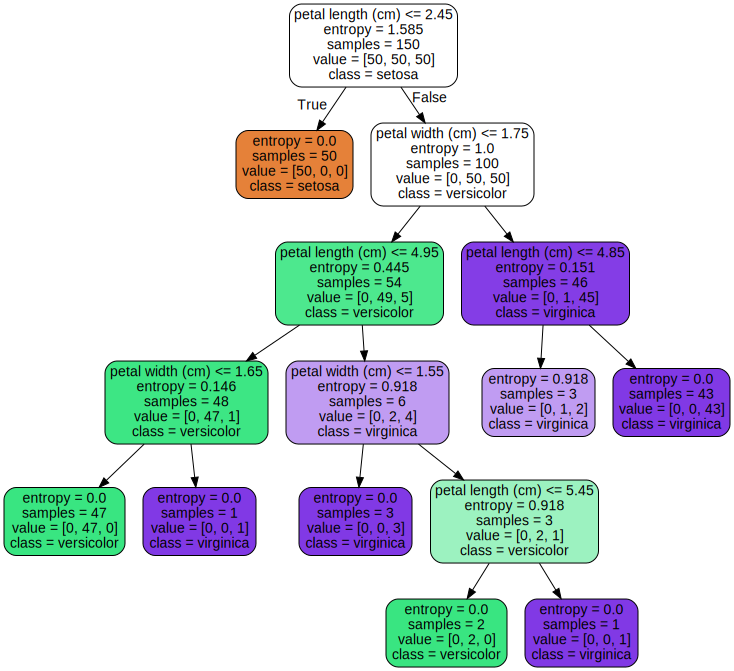

In [10]:
dot_data = export_graphviz(tree_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph

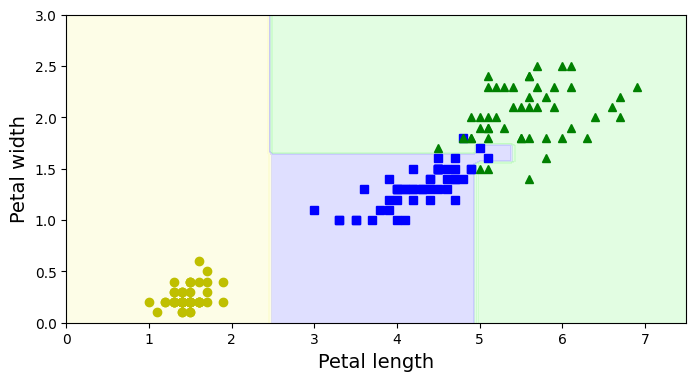

In [11]:
# Plot the decision boundaies.
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

plt.show()

In [12]:
# Use the trained classifier to predict labels for the test features.
y_pred = tree_clf.predict(X)

# Calculate and return the accuracy on the test data
accuracy = accuracy_score(y, y_pred)

print('accuracy: ', accuracy)

accuracy:  0.9933333333333333


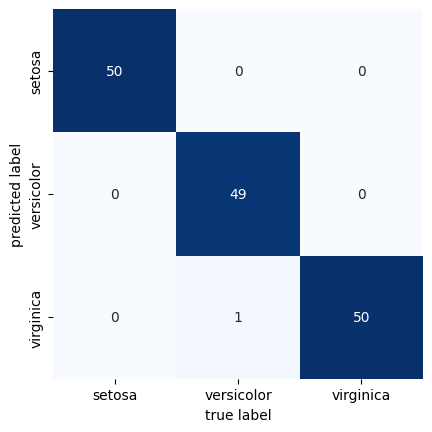

In [13]:
# Plot the confusion matrix.
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=iris.target_names, yticklabels=iris.target_names, cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig('confusion_matrix_bc.png', dpi=600)
plt.show()